In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from datetime import datetime
warnings.filterwarnings('ignore')
pd.pandas.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('Clean.csv')
df.head()

,number_draw,date,winning_number_1,winning_number_2,winning_number_3,winning_number_4,winning_number_5,winning_number_6,additional_number,Group 1 Share Amount,Group 2 Share Amount,Group 3 Share Amount,Group 4 Share Amount,Group 5 Share Amount,Group 6 Share Amount,Group 7 Share Amount,Group 1 No.winning,Group 2 No.winning,Group 3 No.winning,Group 4 No.winning,Group 5 No.winning,Group 6 No.winning,Group 7 No.winning,year,month,day_of_week,Odd,Even,1 to 9,10 to 19,20 to 29,30 to 39,40 to 49,Total,Average,SD,gap_mean,gap_sd,Total winners,consecutive numbers,count_repeated_numbers,repeated_numbers,repeated_numbers_1,repeated_numbers_2,repeated_numbers_3,repeated_numbers_4
0,3639,2021-03-01,5,6,7,13,25,37,30,0,45230,1372,280,50,25,10,0,6,136,364,8458,9917,139177,2021,3,Monday,5,2,3,1,1,2,0,123,17.57,12.99,5.33,3.77,158058,2,0,0,0,0,0,0
1,3640,2021-03-04,11,12,20,28,30,38,27,0,0,1210,331,50,25,10,0,0,207,413,9967,12067,163444,2021,3,Thursday,2,5,0,2,3,2,0,166,23.71,9.88,4.50,3.20,186098,1,1,[30],30,0,0,0
2,3641,2021-03-08,8,13,17,27,33,40,38,2107832,211977,1534,306,50,25,10,3,5,312,855,16812,22050,293700,2021,3,Monday,4,3,1,2,1,2,1,176,25.14,12.64,5.33,2.43,333737,0,2,"[27, 38]",27,38,0,0
3,3642,2021-03-11,12,19,26,41,46,47,35,1291606,135959,1870,405,50,25,10,1,2,100,252,5237,6930,94102,2021,3,Thursday,4,3,0,2,1,1,3,226,32.29,13.63,5.83,2.48,106624,1,0,0,0,0,0,0
4,3643,2021-03-15,12,15,19,28,35,43,44,1291532,271902,1815,484,50,25,10,1,1,103,211,5687,6243,105907,2021,3,Monday,4,3,0,3,1,1,2,196,28.00,13.14,5.33,2.87,118153,1,3,"[19, 35, 12]",19,35,12,0


# Objective
## 1) Identify "hot" and "cold" numbers 
## 2) How often do numbers from the previous draw reappear in subsequent draws?
## 3) Are consecutive numbers (e.g., 12 and 13) more or less likely to appear together in winning combinations?
## 4) Explore if certain numbers are more likely to be selected together.
## 5) Explore the balance of odd and even numbers or high and low numbers in the selected sets.
## 6) Exploring whether smaller or larger sum, average, and standard deviation of Toto values are associated with better chances of jackpot
## 7) Determining which year, month, and day of the week have the highest total number of winners
## 8) Are winning numbers has any correlation?


# 1) Top 10 most frequent numbers

In [3]:
winning_number = ['winning_number_1', 'winning_number_2', 'winning_number_3', 'winning_number_4', 'winning_number_5', 'winning_number_6','additional_number']

In [4]:
new_df = pd.concat([df['winning_number_1'], df['winning_number_2'], df['winning_number_3'],df['winning_number_4'],df['winning_number_5'],df['winning_number_6'],df['additional_number']], ignore_index=True)

In [5]:
print(new_df)

0        5
1       11
2        8
3       12
4       12
        ..
2193     5
2194    27
2195    40
2196    10
2197    16
Length: 2198, dtype: int64


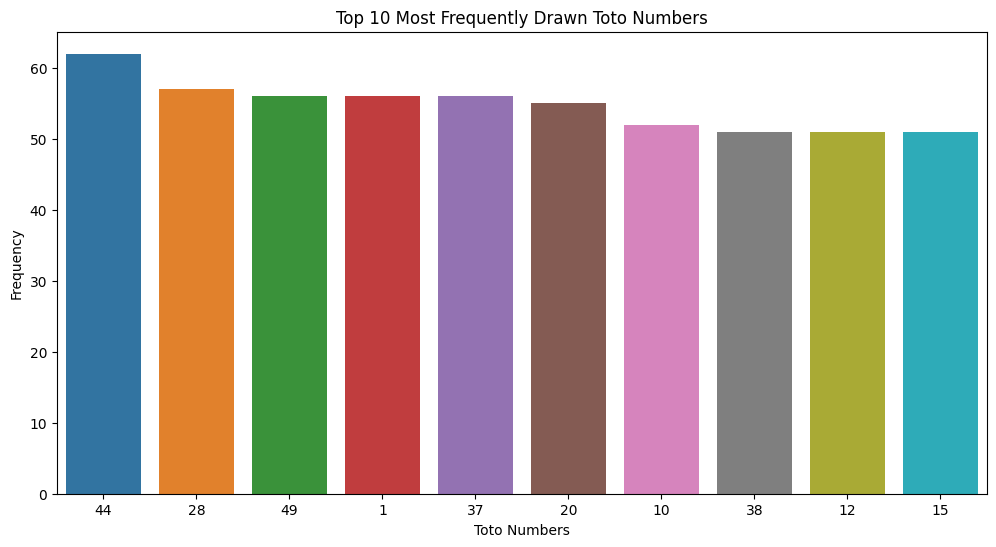

In [6]:
winning_number = ['winning_number_1', 'winning_number_2', 'winning_number_3', 'winning_number_4', 'winning_number_5', 'winning_number_6','additional_number']
new_df = pd.concat([df['winning_number_1'], df['winning_number_2'], df['winning_number_3'],df['winning_number_4'],df['winning_number_5'],df['winning_number_6'],df['additional_number']], ignore_index=True)
value_counts = new_df.value_counts().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.countplot(x=new_df, order = value_counts.index, palette='tab10')
plt.ylabel('Frequency')
plt.xlabel('Toto Numbers')
plt.title('Top 10 Most Frequently Drawn Toto Numbers')
plt.show()

# Bottom 10 most frequent numbers

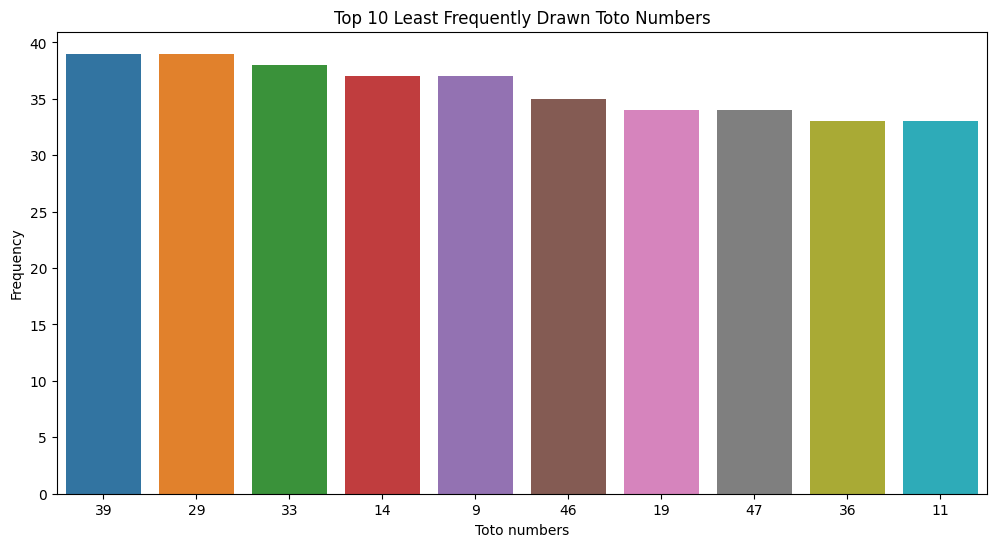

In [7]:
value_counts = new_df.value_counts().sort_values(ascending=True).head(10)
plt.figure(figsize=(12, 6))
sns.countplot(x=new_df, order = value_counts.index[::-1], palette='tab10')
plt.ylabel('Frequency')
plt.xlabel('Toto numbers')
plt.title('Top 10 Least Frequently Drawn Toto Numbers')
plt.show()

# 2) How often do numbers from the previous draw reappear in subsequent draws?

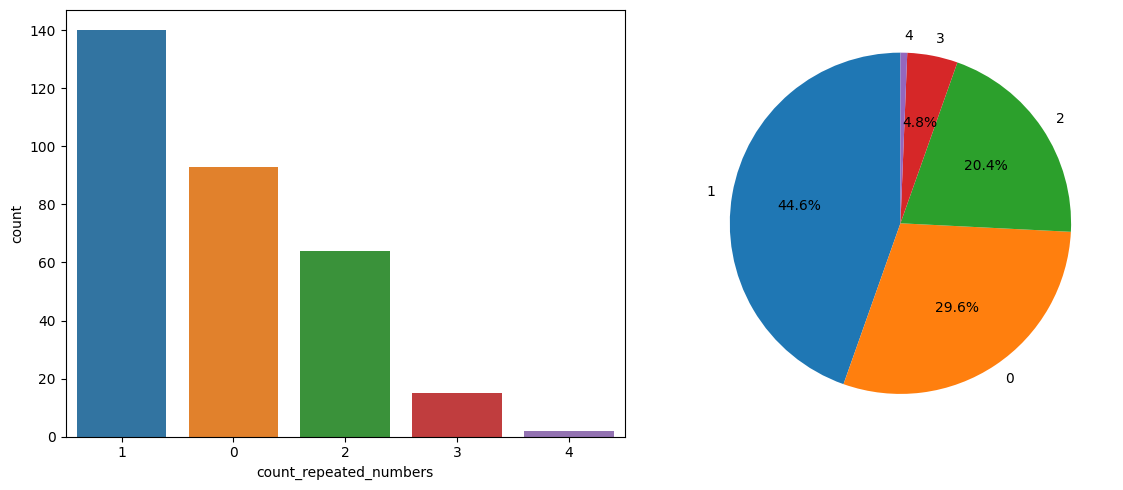

In [8]:
plt.figure(figsize=(12, 5))

# Subplot for the count plot
plt.subplot(1, 2, 1)
sns.countplot(x='count_repeated_numbers', data=df, order=df['count_repeated_numbers'].value_counts().index, palette='tab10')

# Subplot for the pie chart
values = df['count_repeated_numbers'].value_counts()
labels = values.index
percentages = values / values.sum() * 100

def autopct_condition(pct):
    return f'{pct:.1f}%' if pct >= 2 else ''

plt.subplot(1, 2, 2)
plt.pie(values, labels=labels, autopct=autopct_condition, startangle=90)  
plt.ylabel('') 
plt.tight_layout()

plt.show()

# 3) Are consecutive numbers (e.g., 12 and 13) more or less likely to appear together in winning combinations?

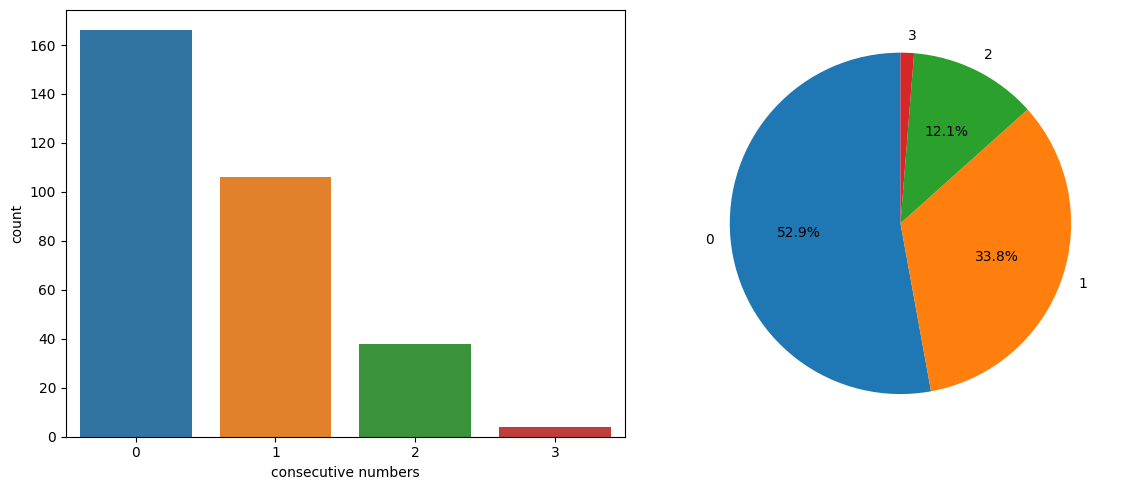

In [9]:
plt.figure(figsize=(12, 5))

# Subplot for the count plot
plt.subplot(1, 2, 1)
sns.countplot(x='consecutive numbers', data=df, order=df['consecutive numbers'].value_counts().index, palette='tab10')

# Subplot for the pie chart
values = df['consecutive numbers'].value_counts()
labels = values.index
percentages = values / values.sum() * 100

def autopct_condition(pct):
    return f'{pct:.1f}%' if pct >= 2 else ''

plt.subplot(1, 2, 2)
plt.pie(values, labels=labels, autopct=autopct_condition, startangle=90)  
plt.ylabel('') 
plt.tight_layout()

plt.show()

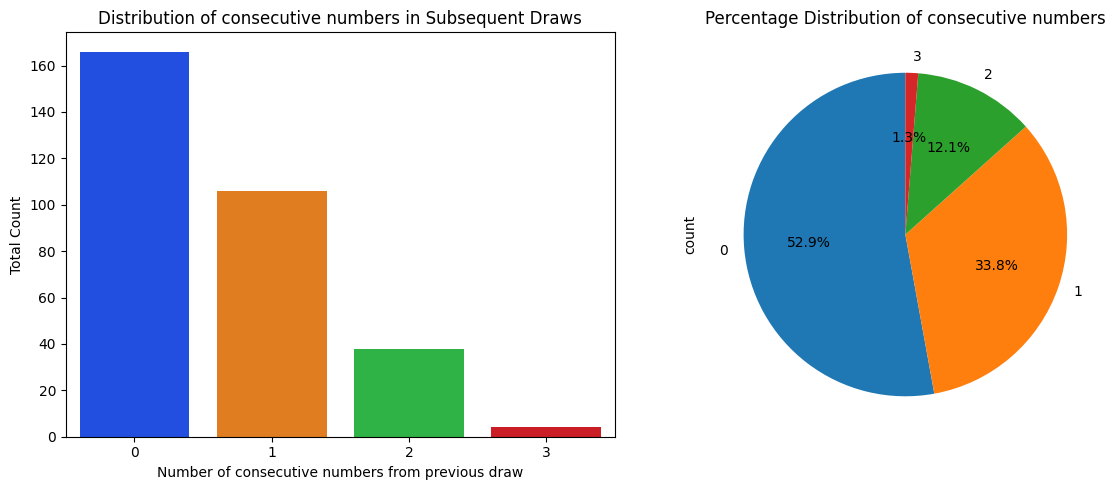

In [10]:
plt.figure(figsize=(12, 5))

# Subplot for the count plot
plt.subplot(1, 2, 1)
sns.countplot(x='consecutive numbers', data=df, order=df['consecutive numbers'].value_counts().index, palette='bright')
plt.xlabel('Number of consecutive numbers from previous draw')
plt.ylabel('Total Count')
plt.title('Distribution of consecutive numbers in Subsequent Draws')

# Subplot for the pie chart
plt.subplot(1, 2, 2)
df['consecutive numbers'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Percentage Distribution of consecutive numbers')

# Adjust layout to prevent overlap
plt.tight_layout()

plt.show()

## There are 47% that has 1 or more consecutive numbers appear together

 # 4) Explore if certain numbers are more likely to be selected together.

In [11]:
lottery_data = np.sort(df[winning_number].values)

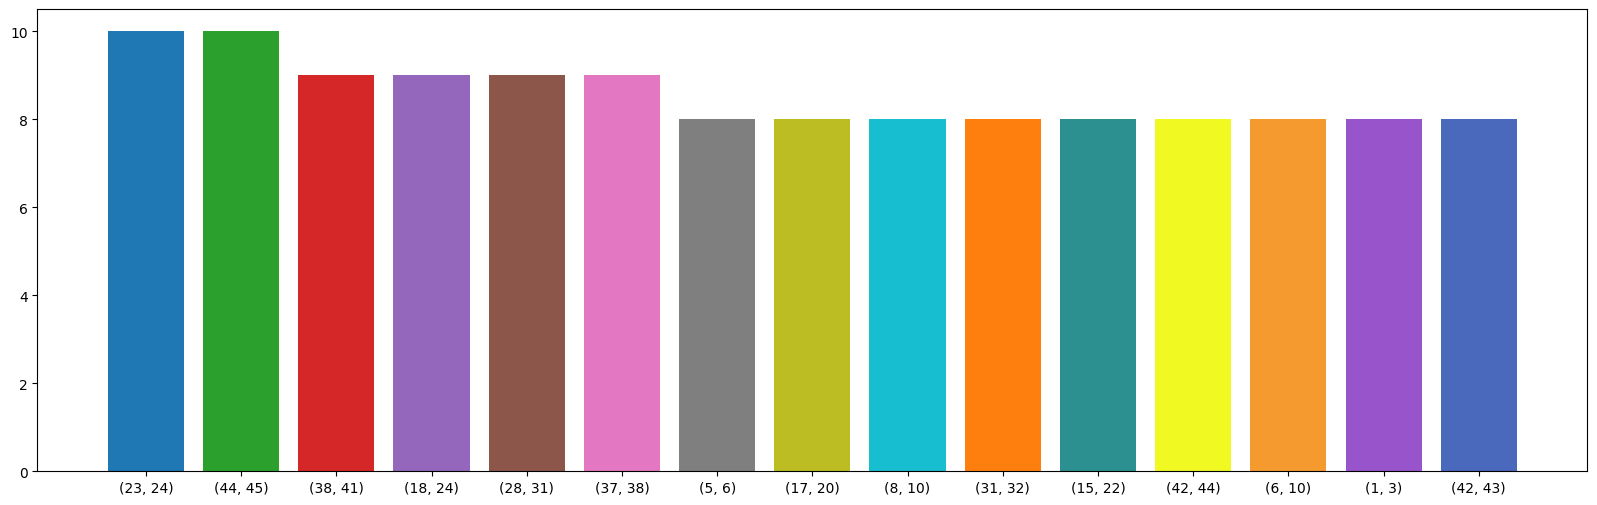

In [12]:
from itertools import combinations
from collections import Counter
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 6))

# Flatten the list of lists to create a single sequence of numbers
flat_numbers = [number for draw in lottery_data for number in draw]

# Function to generate n-grams from a sequence
def generate_ngrams(sequence, n):
    return list(zip(*(sequence[i:] for i in range(n))))

# Function to filter unwanted n-grams
def filter_ngrams(ngrams, n_gram_size):
    if n_gram_size == 2:
        return [ngram for ngram in ngrams if ngram[0] < ngram[1]]
    elif n_gram_size == 3:
        return [ngram for ngram in ngrams if ngram[0] < ngram[1] < ngram[2]]
    elif n_gram_size == 4:
        return [ngram for ngram in ngrams if ngram[0] < ngram[1] < ngram[2] < ngram[3]]
    else:
        # Handle other n-gram sizes or provide a default behavior
        return ngrams

# Specify the desired n-gram size
n_gram_size = 2

# Generate n-grams
ngrams = generate_ngrams(flat_numbers, n_gram_size)

# Filter n-grams where the first number is greater than the second number
filtered_ngrams = filter_ngrams(ngrams, n_gram_size)

colors = ['#1f77b4', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#ff7f0e', '#2b908f', '#f0f921', '#f49a2f', '#9854cb', '#4a69bd']

# Count the occurrences of each n-gram
ngram_counts = Counter(filtered_ngrams)

# Visualize the most common n-grams
common_ngrams = ngram_counts.most_common(15)

# Plot the results
plt.bar(range(len(common_ngrams)), [count for _, count in common_ngrams], tick_label=[str(ngram) for ngram, _ in common_ngrams], color=colors)
#plt.xlabel(f'{n_gram_size}-Grams')
#plt.ylabel('Frequency')
#plt.title(f'Most Common {n_gram_size}-Grams in Lottery Numbers')
plt.show()


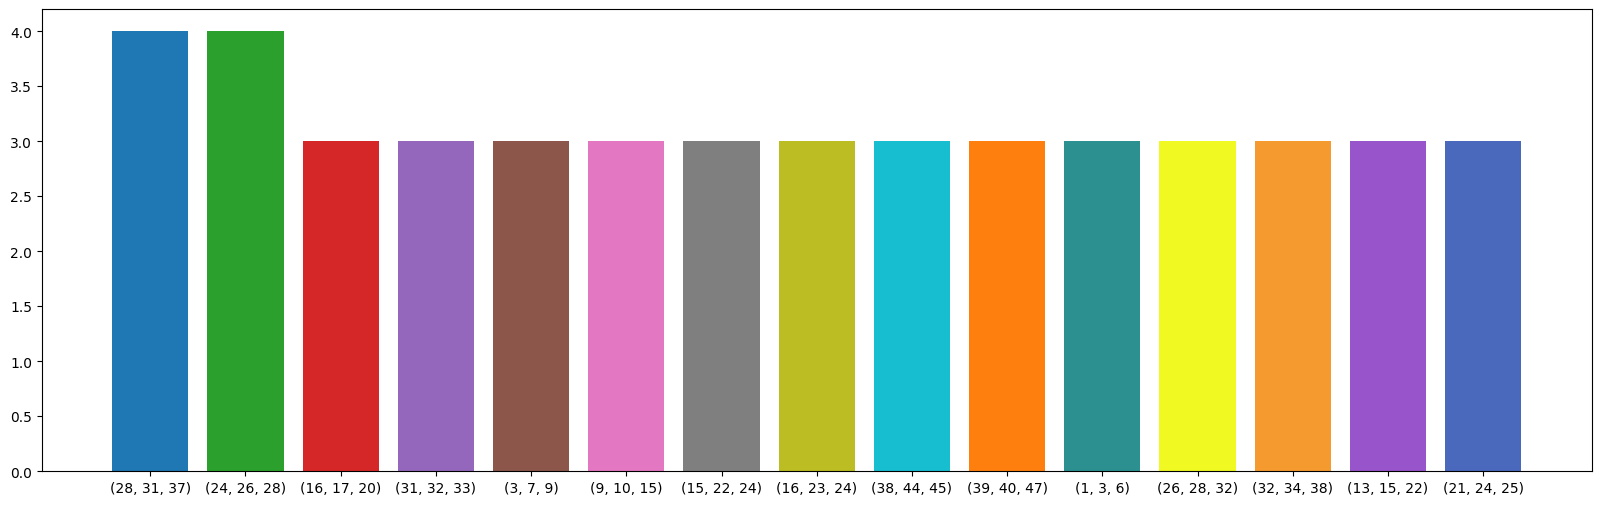

In [13]:
from itertools import combinations
from collections import Counter
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 6))

# Flatten the list of lists to create a single sequence of numbers
flat_numbers = [number for draw in lottery_data for number in draw]

# Function to generate n-grams from a sequence
def generate_ngrams(sequence, n):
    return list(zip(*(sequence[i:] for i in range(n))))

# Function to filter unwanted n-grams
def filter_ngrams(ngrams, n_gram_size):
    if n_gram_size == 2:
        return [ngram for ngram in ngrams if ngram[0] < ngram[1]]
    elif n_gram_size == 3:
        return [ngram for ngram in ngrams if ngram[0] < ngram[1] < ngram[2]]
    elif n_gram_size == 4:
        return [ngram for ngram in ngrams if ngram[0] < ngram[1] < ngram[2] < ngram[3]]
    else:
        # Handle other n-gram sizes or provide a default behavior
        return ngrams

# Specify the desired n-gram size
n_gram_size = 3

# Generate n-grams
ngrams = generate_ngrams(flat_numbers, n_gram_size)

# Filter n-grams where the first number is greater than the second number
filtered_ngrams = filter_ngrams(ngrams, n_gram_size)

colors = ['#1f77b4', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#ff7f0e', '#2b908f', '#f0f921', '#f49a2f', '#9854cb', '#4a69bd']

# Count the occurrences of each n-gram
ngram_counts = Counter(filtered_ngrams)

# Visualize the most common n-grams
common_ngrams = ngram_counts.most_common(15)

# Plot the results
plt.bar(range(len(common_ngrams)), [count for _, count in common_ngrams], tick_label=[str(ngram) for ngram, _ in common_ngrams], color=colors)
#plt.xlabel(f'{n_gram_size}-Grams')
#plt.ylabel('Frequency')
#plt.title(f'Most Common {n_gram_size}-Grams in Lottery Numbers')
plt.show()


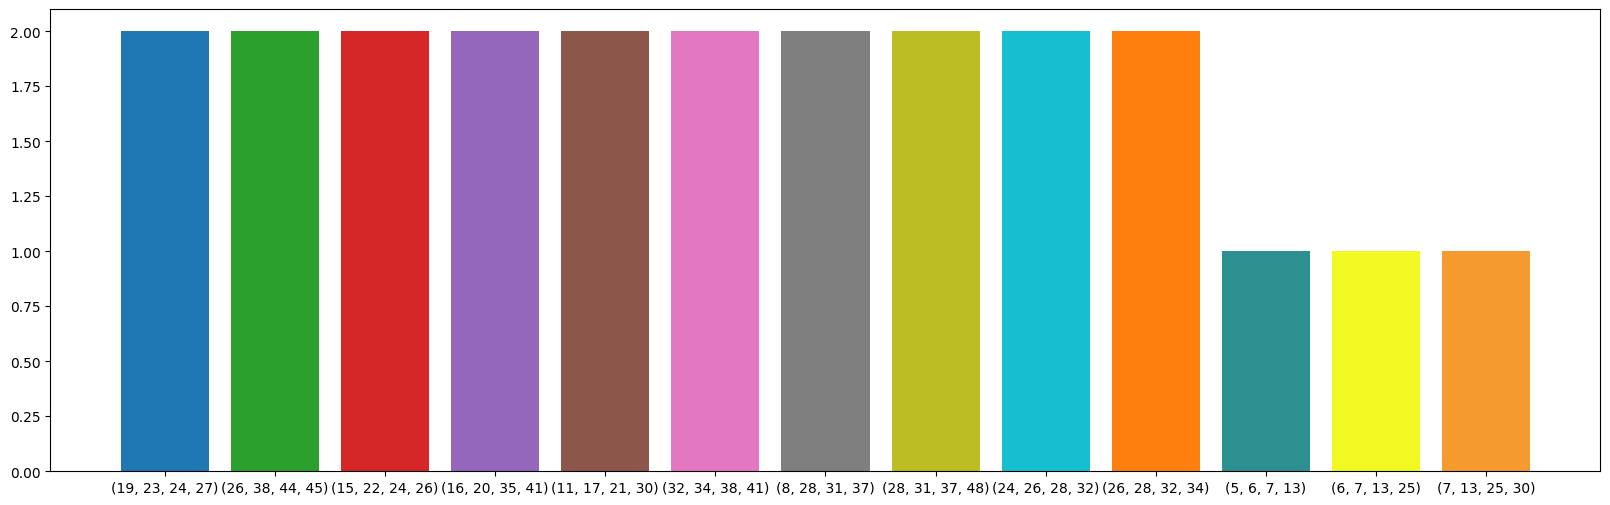

In [14]:
from itertools import combinations
from collections import Counter
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 6))

# Flatten the list of lists to create a single sequence of numbers
flat_numbers = [number for draw in lottery_data for number in draw]

# Function to generate n-grams from a sequence
def generate_ngrams(sequence, n):
    return list(zip(*(sequence[i:] for i in range(n))))

# Function to filter unwanted n-grams
def filter_ngrams(ngrams, n_gram_size):
    if n_gram_size == 2:
        return [ngram for ngram in ngrams if ngram[0] < ngram[1]]
    elif n_gram_size == 3:
        return [ngram for ngram in ngrams if ngram[0] < ngram[1] < ngram[2]]
    elif n_gram_size == 4:
        return [ngram for ngram in ngrams if ngram[0] < ngram[1] < ngram[2] < ngram[3]]
    else:
        # Handle other n-gram sizes or provide a default behavior
        return ngrams

# Specify the desired n-gram size
n_gram_size = 4

# Generate n-grams
ngrams = generate_ngrams(flat_numbers, n_gram_size)

# Filter n-grams where the first number is greater than the second number
filtered_ngrams = filter_ngrams(ngrams, n_gram_size)

colors = ['#1f77b4', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#ff7f0e', '#2b908f', '#f0f921', '#f49a2f', '#9854cb', '#4a69bd']

# Count the occurrences of each n-gram
ngram_counts = Counter(filtered_ngrams)

# Visualize the most common n-grams
common_ngrams = ngram_counts.most_common(13)

# Plot the results
plt.bar(range(len(common_ngrams)), [count for _, count in common_ngrams], tick_label=[str(ngram) for ngram, _ in common_ngrams], color=colors)
#plt.xlabel(f'{n_gram_size}-Grams')
#plt.ylabel('Frequency')
#plt.title(f'Most Common {n_gram_size}-Grams in Lottery Numbers')
plt.show()



# 5) Explore the balance of odd and even numbers or high and low numbers in the selected sets.

In [15]:
odd = []
even = []
for row in lottery_data:
    for j in row:
        if j %2 == 0:
            even.append(j)
        else:
            odd.append(j)

In [16]:
small = []
big = []
for row in lottery_data:
    for j in row:
        if j < 25:
            small.append(j)
        else:
            big.append(j)

In [17]:
zero = []
one = []
two = []
three = []
four = []
for row in lottery_data:
    for j in row:
        if j < 10:
            zero.append(j)
        elif 10<=j<20:
            one.append(j)
        elif 20<=j<30:
            two.append(j)
        elif 30<=j<40:
            three.append(j)
        else:
            four.append(j)

([<matplotlib.patches.Wedge at 0x1f7c986f4c0>,
 [Text(-0.6859070713900672, 0.8599601673432912, 'zero'),
  Text(-1.0507948330430903, -0.3253155681026412, 'one'),
  Text(0.004803984037242154, -1.099989509830603, '2'),
  Text(1.0597105566504161, -0.2949805690611931, '3'),
  Text(0.5858268503819019, 0.9310246513232725, '4')],
 [Text(-0.37413112984912755, 0.4690691821872497, '18.7%'),
  Text(-0.5731608180235037, -0.17744485532871335, '19.5%'),
  Text(0.0026203549294048106, -0.5999942780894197, '21.1%'),
  Text(0.578023939991136, -0.16089849221519623, '20.1%'),
  Text(0.31954191839012824, 0.5078316279945122, '20.7%')])

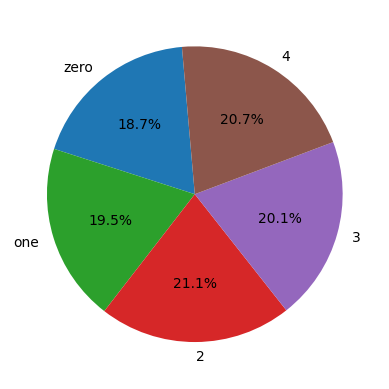

In [18]:
plt.pie([len(zero), len(one), len(two), len(three), len(four)], labels=['zero', 'one', '2', '3' ,'4'], colors=[ '#1f77b4', '#2ca02c', '#d62728', '#9467bd', '#8c564b'], autopct='%1.1f%%', startangle=95)

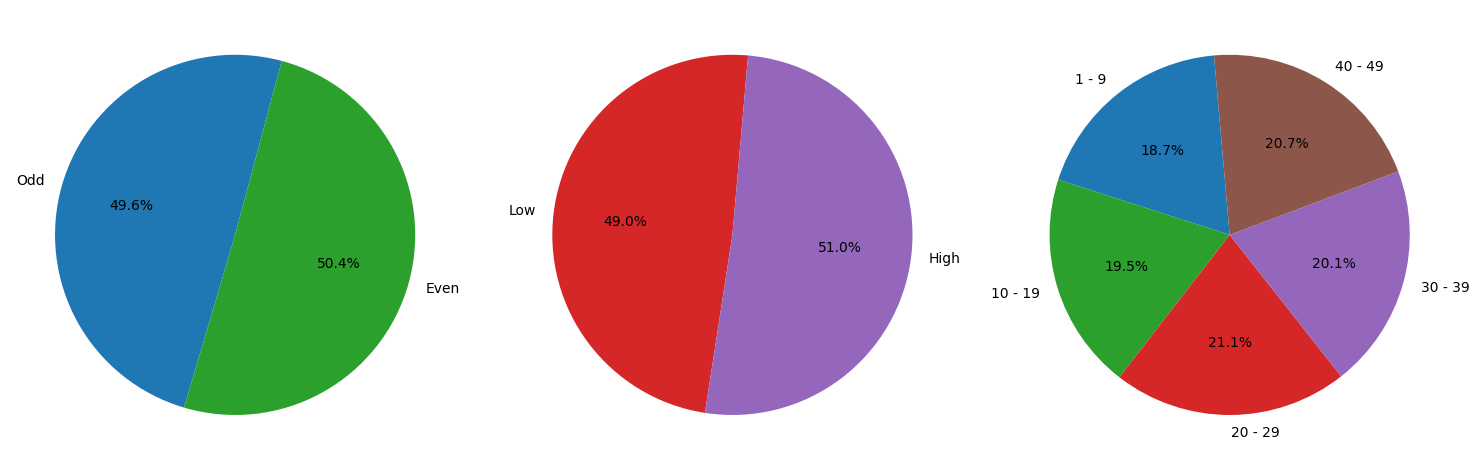

In [19]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 3, 1)
plt.pie([len(odd), len(even)], labels=['Odd', 'Even'], colors=['#1f77b4', '#2ca02c'], autopct='%1.1f%%', startangle=75)
plt.subplot(1, 3, 2)
plt.pie([len(small), len(big)], labels=['Low', 'High'], colors=[ '#d62728', '#9467bd'], autopct='%1.1f%%', startangle=85)
plt.subplot(1, 3, 3)
plt.pie([len(zero), len(one), len(two), len(three), len(four)], labels=['1 - 9', '10 - 19', '20 - 29', '30 - 39' ,'40 - 49'], colors=[ '#1f77b4', '#2ca02c', '#d62728', '#9467bd', '#8c564b'], autopct='%1.1f%%', startangle=95)
plt.tight_layout()
plt.show()

# 6) Exploring whether smaller sum, average, and standard deviation of Toto values are associated with better chances of jackpot

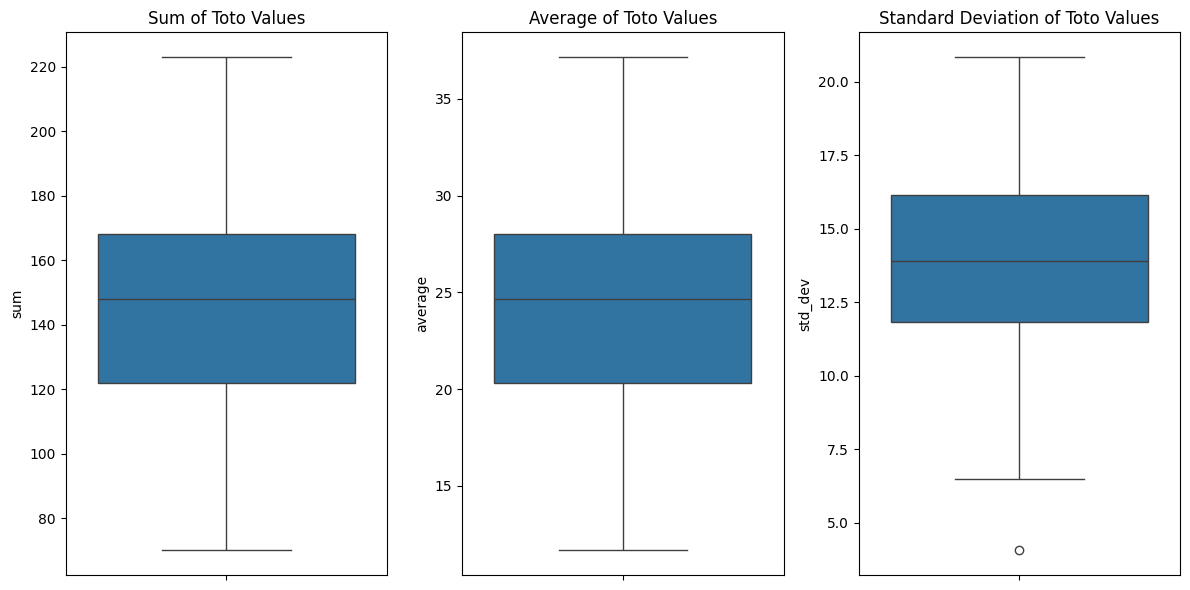

In [20]:
from scipy.stats import ttest_ind

# Load your dataset
# Assuming you have a DataFrame named 'lottery_data' with the columns as mentioned

# Calculate summary statistics
df['sum'] = df[['winning_number_1', 'winning_number_2', 
                                     'winning_number_3', 'winning_number_4', 
                                     'winning_number_5', 'winning_number_6']].sum(axis=1)
df['average'] = df[['winning_number_1', 'winning_number_2', 
                                         'winning_number_3', 'winning_number_4', 
                                         'winning_number_5', 'winning_number_6']].mean(axis=1)
df['std_dev'] = df[['winning_number_1', 'winning_number_2', 
                                          'winning_number_3', 'winning_number_4', 
                                          'winning_number_5', 'winning_number_6']].std(axis=1)

# Select only draws where the first prize was won
first_prize_draws = df[df['Group 1 No.winning '] > 0]
# Visualize distributions
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.boxplot(y='sum', data=first_prize_draws)
plt.title('Sum of Toto Values')

plt.subplot(1, 3, 2)
sns.boxplot(y='average', data=first_prize_draws)
plt.title('Average of Toto Values')

plt.subplot(1, 3, 3)
sns.boxplot(y='std_dev', data=first_prize_draws)
plt.title('Standard Deviation of Toto Values')

plt.tight_layout()
plt.show()



In [21]:
non_first_prize_draws = df[df['Group 1 No.winning '] == 0]

print('No Winners for First Prize',non_first_prize_draws.shape)
print('At least 1 Winners for First Prize',first_prize_draws.shape)

No Winners for First Prize (161, 49)
At least 1 Winners for First Prize (153, 49)


Null Hypothesis(H0): A smaller sum, average, and standard deviation (SD) of Toto values do not affect the chance of winning the jackpot.\
Alternative Hypothesis (H1): A smaller sum, average, and standard deviation (SD) of Toto values are associated with a better chance of winning the jackpot.

In [22]:
non_first_prize_draws['sum'].mean()

154.3726708074534

In [23]:
# Statistical Testing


t_stat, p_value = ttest_ind(first_prize_draws['sum'], non_first_prize_draws['sum'])
print(f"T-Statistic for sum: {t_stat}, p-value: {p_value}")

t_stat, p_value = ttest_ind(first_prize_draws['average'], non_first_prize_draws['average'])
print(f"T-Statistic for average: {t_stat}, p-value: {p_value}")

t_stat, p_value = ttest_ind(first_prize_draws['std_dev'], non_first_prize_draws['std_dev'])
print(f"T-Statistic for standard deviation: {t_stat}, p-value: {p_value}")


T-Statistic for sum: -2.5592709562960536, p-value: 0.010960549644420097
T-Statistic for average: -2.559270956296044, p-value: 0.010960549644420387
T-Statistic for standard deviation: -0.5356600972604814, p-value: 0.5925751143343305


Interpretation:

For the sum and average of Toto values, the t-statistics indicate a significant difference between draws where the first prize was won and draws where it wasn't. The p-values are less than the significance level of 0.05, suggesting that this difference is statistically significant. Therefore, we reject the null hypothesis in favor of the alternative hypothesis.\
However, for the standard deviation of Toto values, the t-statistic is not significant, as the p-value is greater than 0.05. Therefore, we fail to reject the null hypothesis, indicating that there's no significant difference in the standard deviation of Toto values between draws with and without first prize winners.

# 7) Determining which year, month, and day of the week have the highest total number of jackpot


In [61]:
rf = pd.DataFrame(df[df['Group 1 No.winning '] > 0]['year'].value_counts())
rf

,count
year,
2022,55
2023,47
2021,39
2024,12


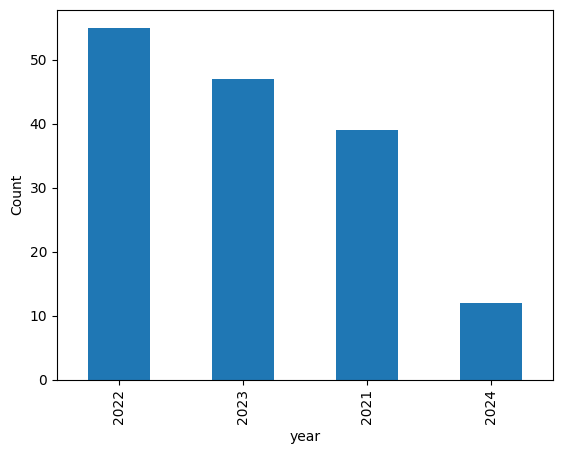

In [62]:
rf.plot(kind='bar', legend=None)
# plt.xlabel('Year')
plt.ylabel('Count')
# plt.title('Number of winners')
plt.show()

In [65]:
rf1 = pd.DataFrame(df[df['Group 1 No.winning '] > 0]['month'].value_counts())
rf1

,count
month,
1,19
5,15
3,14
11,14
2,14
9,13
7,12
8,12
12,12


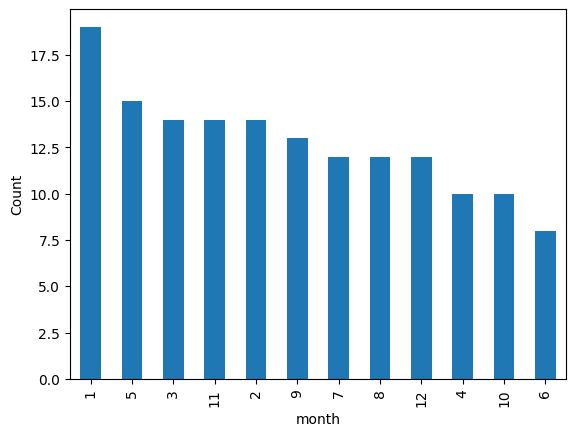

In [60]:
rf1.plot(kind='bar', legend=None)
# plt.xlabel('Year')
plt.ylabel('Count')
# plt.title('Number of winners')
plt.show()

In [63]:
rf2 = pd.DataFrame(df[df['Group 1 No.winning '] > 0]['day_of_week'].value_counts())
rf2

,count
day_of_week,
Monday,76
Thursday,67
Friday,10


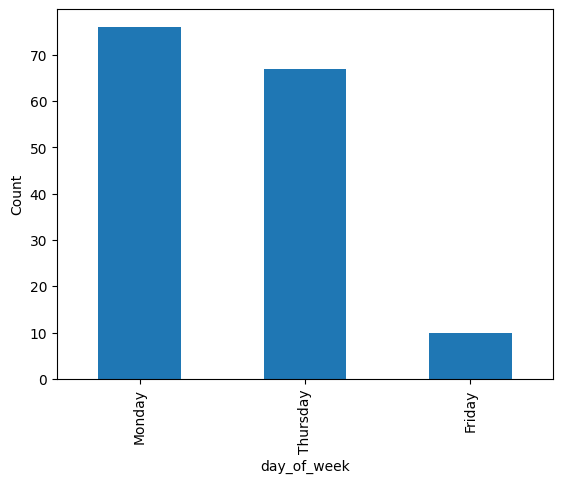

In [64]:
rf2.plot(kind='bar', legend=None)
# plt.xlabel('Year')
plt.ylabel('Count')
# plt.title('Number of winners')
plt.show()

# 8) Are winning numbers has any correlation?

In [66]:
lottery_data = df[['winning_number_1',	'winning_number_2',	'winning_number_3',	'winning_number_4' ,'winning_number_5'	,'winning_number_6'	,'additional_number']]
lottery_data.head()

,winning_number_1,winning_number_2,winning_number_3,winning_number_4,winning_number_5,winning_number_6,additional_number
0,5,6,7,13,25,37,30
1,11,12,20,28,30,38,27
2,8,13,17,27,33,40,38
3,12,19,26,41,46,47,35
4,12,15,19,28,35,43,44


In [18]:
winning_number_1 = lottery_data['winning_number_1']
winning_number_2 = lottery_data['winning_number_2']
winning_number_3 = lottery_data['winning_number_3']
winning_number_4 = lottery_data['winning_number_4']
winning_number_5 = lottery_data['winning_number_5']
winning_number_6 = lottery_data['winning_number_6']

In [81]:
from scipy.stats import spearmanr

winning_number_1 = lottery_data['winning_number_1']
winning_number_2 = lottery_data['winning_number_2']
winning_number_3 = lottery_data['winning_number_3']
winning_number_4 = lottery_data['winning_number_4']
winning_number_5 = lottery_data['winning_number_5']
winning_number_6 = lottery_data['winning_number_6']
# Perform the Mann-Whitney U test
statistic, p_value = spearmanr(winning_number_1, winning_number_6)

# Print the results
print("spearmanr :", statistic)
print("P-value:", p_value)

spearmanr : -0.027920870842969858
P-value: 0.6220959678299645


In [82]:
from itertools import combinations
from scipy.stats import mannwhitneyu


winning_numbers = [lottery_data['winning_number_1'], 
                   lottery_data['winning_number_2'], 
                   lottery_data['winning_number_3'], 
                   lottery_data['winning_number_4'], 
                   lottery_data['winning_number_5'], 
                   lottery_data['winning_number_6']]


results = []


for i, j in combinations(range(len(winning_numbers)), 2):

    statistic, p_value = spearmanr(winning_numbers[i], winning_numbers[j])
  

    results.append({'Pair': f'winning_number_{i+1} - winning_number_{j+1}', 
                    'statistic': statistic,
                    'P-value': p_value})


# for result in results:
#     print(result)
    
results_df = pd.DataFrame(results)

results_df

,Pair,statistic,P-value
0,winning_number_1 - winning_number_2,0.598996,5.834455e-32
1,winning_number_1 - winning_number_3,0.369464,1.365390e-11
2,winning_number_1 - winning_number_4,0.210905,1.667006e-04
3,winning_number_1 - winning_number_5,0.111736,4.789882e-02
4,winning_number_1 - winning_number_6,-0.027921,6.220960e-01
5,winning_number_2 - winning_number_3,0.709904,2.004832e-49
6,winning_number_2 - winning_number_4,0.538292,5.489922e-25
7,winning_number_2 - winning_number_5,0.351910,1.386052e-10
8,winning_number_2 - winning_number_6,0.184885,9.964346e-04
9,winning_number_3 - winning_number_4,0.730469,1.312660e-53


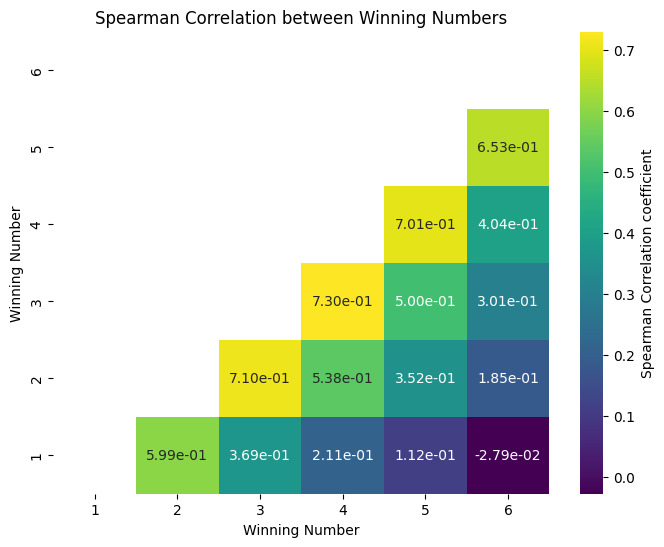

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set the size of the plot
plt.figure(figsize=(8, 6))

# Reshape the p-values into a matrix form
p_values_matrix = np.zeros((6, 6))
for result in results:
    pair = result['Pair'].split(' - ')
    i = int(pair[0].split('_')[-1]) - 1
    j = int(pair[1].split('_')[-1]) - 1
    p_values_matrix[i, j] = result['statistic']

# Replace zero values with NaN
p_values_matrix[p_values_matrix == 0] = np.nan

# Create a heatmap of the p-values
sns.heatmap(p_values_matrix, annot=True, cmap='viridis', fmt='.2e', cbar_kws={'label': 'Spearman Correlation coefficient'})
plt.title('Spearman Correlation between Winning Numbers')
plt.xlabel('Winning Number')
plt.ylabel('Winning Number')
plt.xticks(ticks=np.arange(0.5, 6.5), labels=np.arange(1, 7))
plt.yticks(ticks=np.arange(0.5, 6.5), labels=np.arange(1, 7))
plt.gca().invert_yaxis()  # Invert y-axis to match DataFrame index order
plt.show()
